## Table of Contents <a id="toc"></a>

1. [Pulling New Data](#pull-data)
2. [Load Previous Output](#load-prior)
2. Aggregating / Comparing
2. [Integrate with Prior File](#integrate-with-previous)
2. [Schema to Replicate](#schema2replicate) - the raw format from the previous script before running additional aggregations to generate summaries. 
2. [Join With Previous](#join-with-previous)
2. [Update 1/25/2022](#1-25-2022)

In [3]:
import pandas as pd
import datetime
import requests

Orion at NYU said this:

What you can do for now is use these links (current month daily, previous month daily, last three months weekly, previous three months weekly):

* [November](https://api.jaildatainitiative.org/dashboards/get_pops?jails=&races=&ages=&genders=&date=November)
* [October](https://api.jaildatainitiative.org/dashboards/get_pops?jails=&races=&ages=&genders=&date=October)
* [September - November](https://api.jaildatainitiative.org/dashboards/get_pops?jails=&races=&ages=&genders=&date=September-November)
* [June-August](https://api.jaildatainitiative.org/dashboards/get_pops?jails=&races=&ages=&genders=&date=June-August)

## Get New Data <a id="pull-data"></a>

In [3]:
def pull_jdi_api(url):
    response = requests.get(url)
    df = pd.DataFrame(response.json()['data'])
    df.Date = pd.to_datetime(df.Date)
    return df

In [5]:
url = "https://api.jaildatainitiative.org/dashboards/get_pops?jails=&races=&ages=&genders=&date=November"
response = requests.get(url)
nov = pd.DataFrame(response.json()['data'])
nov.head()

,Date,Race,Age,Gender,JailId,Population_Interpolated,Admissions_Interpolated,Releases_Interpolated,ScrapeMissing
0,2021-11-01T00:00:00.000Z,All,All,All,FL-Hillsborough,2945.0,48.0,0.0,0
1,2021-11-01T00:00:00.000Z,All,All,All,TX-Collin,1148.0,40.0,36.0,0
2,2021-11-01T00:00:00.000Z,All,All,All,MN-Stearns,153.0,8.0,18.0,0
3,2021-11-01T00:00:00.000Z,All,All,All,IN-Marion,2037.0,64.0,102.0,0
4,2021-11-01T00:00:00.000Z,All,All,All,VA-Virginia_Beach,1190.0,13.0,17.0,0


In [16]:
pull_time = datetime.datetime.now().strftime("%m-%d-%Y-%-H%M%P")
filename = "October_Data_pulled_{}.csv".format(pull_time)
print("Saving to: ", filename)
nov.to_csv(filename,index=False)

In [6]:
nov.ScrapeMissing.value_counts(normalize=True)

0    0.959542
1    0.040458
Name: ScrapeMissing, dtype: float64

In [108]:
oct_url = "https://api.jaildatainitiative.org/dashboards/get_pops?jails=&races=&ages=&genders=&date=October"
october = pull_jdi_api(oct_url)
october.head(2)

,Date,Race,Age,Gender,JailId,Population_Interpolated,Admissions_Interpolated,Releases_Interpolated,ScrapeMissing
0,2021-12-01 00:00:00+00:00,All,All,All,FL-Hillsborough,2860.0,99.0,110.0,0
1,2021-12-01 00:00:00+00:00,All,All,All,TX-Collin,1054.0,37.0,49.0,0


In [109]:
pull_time = datetime.datetime.now().strftime("%m-%d-%Y-%-H%M%P")
filename = "October_Data_pulled_{}.csv".format(pull_time)
print("Saving to: ", filename)
october.to_csv(filename,index=False)

Saving to:  October_Data_pulled_01-25-2022-2157P.csv


In [17]:
october.ScrapeMissing.value_counts(normalize=True)

0    0.927201
1    0.072799
Name: ScrapeMissing, dtype: float64

In [19]:
sept_nov_wkly_url = "https://api.jaildatainitiative.org/dashboards/get_pops?jails=&races=&ages=&genders=&date=September-November"
sept_nov_wkly = pull_jdi_api(sept_nov_wkly_url)
sept_nov_wkly.head(2)

,Date,Race,Age,Gender,JailId,Population_Interpolated,Admissions_Interpolated,Releases_Interpolated,ScrapeMissing
0,2021-08-29 00:00:00+00:00,All,All,All,FL-Hillsborough,2821.250000,67.75000,56.500000,0
1,2021-08-29 00:00:00+00:00,All,All,All,TX-Collin,1129.467391,10.73913,11.282609,1


In [20]:
pull_time = datetime.datetime.now().strftime("%m-%d-%Y-%-H%M%P")
filename = "Sept-Nov_Weekly_Data_pulled_{}.csv".format(pull_time)
print("Saving to: ", filename)
sept_nov_wkly.to_csv(filename,index=False)

Saving to:  Sept-Nov_Weekly_Data_pulled_01-09-2022-1033am.csv


In [24]:
june_aug_wkly_url = "https://api.jaildatainitiative.org/dashboards/get_pops?jails=&races=&ages=&genders=&date=June-August"
june_aug_wkly = pull_jdi_api(june_aug_wkly_url)

pull_time = datetime.datetime.now().strftime("%m-%d-%Y-%-H%M%P")
filename = "June-Aug_Weekly_Data_pulled_{}.csv".format(pull_time)
print("Saving to: ", filename)
june_aug_wkly.to_csv(filename,index=False)

june_aug_wkly.head(2)

Saving to:  June-Aug_Weekly_Data_pulled_01-09-2022-1044am.csv


,Date,Race,Age,Gender,JailId,Population_Interpolated,Admissions_Interpolated,Releases_Interpolated,ScrapeMissing
0,2021-05-30 00:00:00+00:00,All,All,All,TX-Collin,980.4,43.4,37.6,0
1,2021-05-30 00:00:00+00:00,All,All,All,IN-Marion,1906.2,79.4,86.6,0


## Load Previous Output <a id="load-prior"></a>

[Return to Table of Contents](#toc)


In [35]:
prior = pd.read_excel("Jail_Summaries_as_of_10-08-2021.xlsx", engine="openpyxl")
print(prior.shape)
prior.head(3)

(415, 79)


,STATE-COUNTY,2020-03-10 00:00:00,2020-03-16 00:00:00,2020-04-06 00:00:00,2020-05-04 00:00:00,2020-06-01 00:00:00,2020-07-06 00:00:00,2020-08-03 00:00:00,2020-09-07 00:00:00,2020-10-05 00:00:00,...,FirstMondayAvailable07-2020,FirstMondayAvailable07-2021,FirstMondayAvailable08-2020,FirstMondayAvailable08-2021,FirstMondayAvailable09-2020,FirstMondayAvailable09-2021,FirstMondayAvailable10-2020,FirstMondayAvailable10-2021,FirstMondayAvailable11-2020,FirstMondayAvailable12-2020
0,AL-Autauga,172,178.0,139.0,156.0,174.0,170.0,147.0,160.0,160.0,...,170.0,158.0,147.0,159.0,160.0,150.0,160.0,158.0,185.0,184.0
1,AL-Chilton,212,207.0,152.0,172.0,175.0,184.0,158.0,153.0,188.0,...,184.0,198.0,158.0,216.0,153.0,194.0,188.0,218.0,184.0,200.0
2,AL-Clay,39,42.0,31.0,28.0,31.0,34.0,30.0,32.0,36.0,...,34.0,60.0,30.0,44.0,32.0,54.0,36.0,54.0,33.0,30.0


In [30]:
prior_sheet2 = pd.read_excel("Jail_Summaries_as_of_10-08-2021.xlsx", sheet_name=1, engine="openpyxl")
print(prior_sheet2.shape)
prior_sheet2.head(3)

(577, 4)


,Scrape_Date,Count_Of_Jails,Total_Jail_Population,Seven_Day_Rolling_Average
0,2020-03-10,415,116372,NaN
1,2020-03-11,399,112775,NaN
2,2020-03-12,404,114083,NaN


In [31]:
prior_sheet2.tail(3)

,Scrape_Date,Count_Of_Jails,Total_Jail_Population,Seven_Day_Rolling_Average
574,2021-10-05,397,99014,98766.857143
575,2021-10-06,396,98615,98704.571429
576,2021-10-07,394,97997,98643.571429


In [32]:
prior.columns

Index([               'STATE-COUNTY',           2020-03-10 00:00:00,
                 2020-03-16 00:00:00,           2020-04-06 00:00:00,
                 2020-05-04 00:00:00,           2020-06-01 00:00:00,
                 2020-07-06 00:00:00,           2020-08-03 00:00:00,
                 2020-09-07 00:00:00,           2020-10-05 00:00:00,
                 2020-11-02 00:00:00,           2020-12-07 00:00:00,
                 2021-01-04 00:00:00,           2021-02-01 00:00:00,
                 2021-03-01 00:00:00,           2021-04-05 00:00:00,
                 2021-05-03 00:00:00,           2021-06-07 00:00:00,
                 2021-07-05 00:00:00,           2021-07-16 00:00:00,
                 2021-08-01 00:00:00,           2021-08-02 00:00:00,
                 2021-08-16 00:00:00,           2021-08-19 00:00:00,
                 2021-08-23 00:00:00,           2021-08-26 00:00:00,
                 2021-08-27 00:00:00,           2021-08-28 00:00:00,
                 2021-08-29 00:00:

## Questions 

* Is Weekly an Average of Daily?
* Do JailIds align with previous output file?

## Do JailIds Match to Prior File STATE-COUNTY?

In [36]:
nov.JailId.isin(prior['STATE-COUNTY']).value_counts(normalize=True)

False    0.594347
True     0.405653
Name: JailId, dtype: float64

### 96% of entries found for November.

In [37]:
prior['STATE-COUNTY'].isin(nov.JailId).value_counts(normalize=True)

True     0.975904
False    0.024096
Name: STATE-COUNTY, dtype: float64

### 97.5% Found for October

In [38]:
prior['STATE-COUNTY'].isin(october.JailId).value_counts(normalize=True)

True     0.985542
False    0.014458
Name: STATE-COUNTY, dtype: float64

## Jails in Nov VS Oct Daily

In [39]:
print("Percentage of Nov Jails in Oct File:")
print(nov.JailId.isin(october.JailId).value_counts(normalize=True))
print("Nov Ids not in Oct:")
nov[~nov.JailId.isin(october.JailId)]['JailId'].unique()

Percentage of Nov Jails in Oct File:
True     0.981959
False    0.018041
Name: JailId, dtype: float64
Nov Ids not in Oct:


array(['TX-Kerr', 'AR-Randolph', 'FL-Gadsden', 'LA-Plaquemines',
       'TX-Comal', 'TX-Grayson', 'FL-Columbia', 'TX-Gregg', 'TX-Parker',
       'FL-Hamilton', 'TX-Henderson', 'TX-Hale', 'TX-Howard', 'TX-Lamar',
       'TX-Wood', 'TX-Andrews', 'MN-Benton', 'AR-Izard'], dtype=object)

In [40]:
print("Percentage of Oct Jails in Nov File:")
print(october.JailId.isin(nov.JailId).value_counts(normalize=True))

print("Oct Ids not in Nov:")
october[~october.JailId.isin(nov.JailId)]['JailId'].unique()

Percentage of Oct Jails in Nov File:
True     0.988893
False    0.011107
Name: JailId, dtype: float64
Oct Ids not in Nov:


array(['AZ-Pinal', 'CA-Shasta', 'WI-Milwaukee', 'WI-Ozaukee',
       'TX-Wichita', 'KY-Greenup', 'MA-Worcester', 'MT-Yellowstone',
       'NM-Hobbs', 'MN-Cook', 'ID-Canyon'], dtype=object)

## Full Summary

In [41]:
jails = set()
for df in [nov, october, sept_nov_wkly, june_aug_wkly]:
    jails = jails.union(set(df.JailId.unique()))
jail_summaries = pd.DataFrame(sorted(list(jails)))
jail_summaries.columns = ['JailId']
# jail_summaries.set_index('JailId')
jail_summaries['Nov'] = jail_summaries['JailId'].isin(nov.JailId.unique())
jail_summaries['Oct'] = jail_summaries['JailId'].isin(october.JailId.unique())
jail_summaries['Sept-Nov'] = jail_summaries['JailId'].isin(sept_nov_wkly.JailId.unique())
jail_summaries['June-Aug'] = jail_summaries['JailId'].isin(june_aug_wkly.JailId.unique())
jail_summaries.to_csv("JDI_Coverage_By_JailID_and_ScrapeFile.csv", index=False)
jail_summaries.head()

,JailId,Nov,Oct,Sept-Nov,June-Aug
0,AL-Autauga,True,True,True,True
1,AL-Baldwin,True,True,True,True
2,AL-Blount,True,True,True,True
3,AL-Calhoun,True,True,True,True
4,AL-Cherokee,True,True,True,True


## Nov VS Prior File

In [42]:
missing = prior[~prior['STATE-COUNTY'].isin(nov.JailId)]['STATE-COUNTY'].unique()
print(len(missing))
missing

10


array(['CA-Shasta', 'ID-Canyon', 'KY-Allen', 'MA-Worcester', 'MN-Brown',
       'NE-Lancaster', 'NM-Hobbs', 'OR-Marion_Work_Center', 'TX-Brown',
       'TX-Lubbock'], dtype=object)

In [43]:
from fuzzywuzzy import fuzz, process

/home/matt/.local/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [44]:
process.extractBests('MA-Worcester', nov[nov.JailId.str.startswith("MA-")].JailId.unique())

[]

### November Does Not Contain MA Jails.

In [45]:
nov[nov.JailId.str.startswith("MA-")]

,Date,Race,Age,Gender,JailId,Population_Interpolated,Admissions_Interpolated,Releases_Interpolated,ScrapeMissing


#### Does Exist in Oct File

In [46]:
october[october.JailId.str.startswith("MA-")].head()

,Date,Race,Age,Gender,JailId,Population_Interpolated,Admissions_Interpolated,Releases_Interpolated,ScrapeMissing
746,2021-10-01 00:00:00+00:00,All,All,All,MA-Worcester,641.0,19.0,15.0,0
1732,2021-10-02 00:00:00+00:00,All,All,All,MA-Worcester,633.0,7.0,2.0,0
2722,2021-10-03 00:00:00+00:00,All,All,All,MA-Worcester,634.0,3.0,1.0,0
3710,2021-10-04 00:00:00+00:00,All,All,All,MA-Worcester,633.0,0.0,2.0,0
4699,2021-10-05 00:00:00+00:00,All,All,All,MA-Worcester,641.0,10.0,15.0,0


## Prior Missing From October

In [47]:
missing = prior[~prior['STATE-COUNTY'].isin(october.JailId)]['STATE-COUNTY'].unique()
print(len(missing))
missing

6


array(['KY-Allen', 'MN-Brown', 'NE-Lancaster', 'OR-Marion_Work_Center',
       'TX-Brown', 'TX-Lubbock'], dtype=object)

## Prior Missing From October and Nov Daily

In [48]:
missing = prior[(~prior['STATE-COUNTY'].isin(nov.JailId))
               & (~prior['STATE-COUNTY'].isin(october.JailId))]['STATE-COUNTY'].unique()
print(len(missing))
missing

6


array(['KY-Allen', 'MN-Brown', 'NE-Lancaster', 'OR-Marion_Work_Center',
       'TX-Brown', 'TX-Lubbock'], dtype=object)

## Prior Missing From All

In [49]:
missing = prior[(~prior['STATE-COUNTY'].isin(nov.JailId))
               & (~prior['STATE-COUNTY'].isin(october.JailId))
               & (~prior['STATE-COUNTY'].isin(sept_nov_wkly.JailId))
               & (~prior['STATE-COUNTY'].isin(june_aug_wkly.JailId))]['STATE-COUNTY'].unique()
print(len(missing))
missing

3


array(['NE-Lancaster', 'OR-Marion_Work_Center', 'TX-Lubbock'],
      dtype=object)

## Daily vs Weekly Comparisons

In [50]:
ex = "AL-Autauga"
nov[nov.JailId == "AL-Autauga"].head(20)

,Date,Race,Age,Gender,JailId,Population_Interpolated,Admissions_Interpolated,Releases_Interpolated,ScrapeMissing
114,2021-11-01T00:00:00.000Z,All,All,All,AL-Autauga,162.0,2.0,0.0,0
1113,2021-11-02T00:00:00.000Z,All,All,All,AL-Autauga,165.0,4.0,0.0,0
2110,2021-11-03T00:00:00.000Z,All,All,All,AL-Autauga,165.0,4.0,0.0,0
3110,2021-11-04T00:00:00.000Z,All,All,All,AL-Autauga,162.0,4.0,0.0,0
4108,2021-11-05T00:00:00.000Z,All,All,All,AL-Autauga,160.0,4.0,0.0,0
5103,2021-11-06T00:00:00.000Z,All,All,All,AL-Autauga,159.0,1.0,0.0,0
6102,2021-11-07T00:00:00.000Z,All,All,All,AL-Autauga,162.0,4.0,0.0,0
7097,2021-11-08T00:00:00.000Z,All,All,All,AL-Autauga,161.0,1.0,0.0,0
8098,2021-11-09T00:00:00.000Z,All,All,All,AL-Autauga,161.0,1.0,0.0,0
9095,2021-11-10T00:00:00.000Z,All,All,All,AL-Autauga,165.0,8.0,0.0,0


In [51]:
nov.Date = pd.to_datetime(nov.Date)

In [52]:
nov[nov.JailId == "AL-Autauga"].set_index('Date').rolling(7).mean()#.groupby(pd.Grouper(freq="W")).max()

,Population_Interpolated,Admissions_Interpolated,Releases_Interpolated,ScrapeMissing
Date,,,,
2021-11-01 00:00:00+00:00,NaN,NaN,NaN,NaN
2021-11-02 00:00:00+00:00,NaN,NaN,NaN,NaN
2021-11-03 00:00:00+00:00,NaN,NaN,NaN,NaN
2021-11-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2021-11-05 00:00:00+00:00,NaN,NaN,NaN,NaN
2021-11-06 00:00:00+00:00,NaN,NaN,NaN,NaN
2021-11-07 00:00:00+00:00,162.142857,3.285714,0.0,0.0
2021-11-08 00:00:00+00:00,162.000000,3.142857,0.0,0.0
2021-11-09 00:00:00+00:00,161.428571,2.714286,0.0,0.0


In [53]:
nov[nov.JailId == "AL-Autauga"].mean()

/home/matt/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


Population_Interpolated    167.0
Admissions_Interpolated      3.6
Releases_Interpolated        0.0
ScrapeMissing                0.0
dtype: float64

In [54]:
temp = sept_nov_wkly[(sept_nov_wkly.JailId == "AL-Autauga")
             & (sept_nov_wkly.Date >= pd.to_datetime("2021-11-01", utc=True))]
temp.mean()

/home/matt/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


Population_Interpolated    167.845238
Admissions_Interpolated      3.511905
Releases_Interpolated        0.000000
ScrapeMissing                0.000000
dtype: float64

## Ability to Integrate with Prior File <a id="integrate-with-previous"></a>

[Return to Table of Contents](#toc)


#### Combine October and November File - check that total length of first two files matches that of joined file 

> **(used .shape which returns nrows, ncols)**

In [117]:
print(len(october)+len(nov))
nov_oct = pd.concat([nov, october])
print(nov_oct.shape)
nov_oct.head()

60633
(60633, 9)


,Date,Race,Age,Gender,JailId,Population_Interpolated,Admissions_Interpolated,Releases_Interpolated,ScrapeMissing
0,2021-11-01 00:00:00+00:00,All,All,All,FL-Hillsborough,2945.0,48.0,0.0,0
1,2021-11-01 00:00:00+00:00,All,All,All,TX-Collin,1148.0,40.0,36.0,0
2,2021-11-01 00:00:00+00:00,All,All,All,MN-Stearns,153.0,8.0,18.0,0
3,2021-11-01 00:00:00+00:00,All,All,All,IN-Marion,2037.0,64.0,102.0,0
4,2021-11-01 00:00:00+00:00,All,All,All,VA-Virginia_Beach,1190.0,13.0,17.0,0


## Identifying Two MidPoints to Divide Time into Thirds

In [118]:
most_recent = pd.to_datetime("11-30-2021")
mar_10 = pd.to_datetime("03-10-2020")
day_length = (most_recent - mar_10).days
day_length

630

In [119]:
day_length / 3

210.0

In [120]:
first_tripoint = mar_10 + pd.Timedelta(days=day_length/3)
first_tripoint

Timestamp('2020-10-06 00:00:00')

In [121]:
second_tripoint = mar_10 + pd.Timedelta(days=(day_length/3*2))
second_tripoint

Timestamp('2021-05-04 00:00:00')

In [122]:
nov.head(2)

,Date,Race,Age,Gender,JailId,Population_Interpolated,Admissions_Interpolated,Releases_Interpolated,ScrapeMissing
0,2021-11-01 00:00:00+00:00,All,All,All,FL-Hillsborough,2945.0,48.0,0.0,0
1,2021-11-01 00:00:00+00:00,All,All,All,TX-Collin,1148.0,40.0,36.0,0


In [123]:
nov.groupby(['JailId']).tail(1).Date.value_counts()

2021-11-30 00:00:00+00:00    998
Name: Date, dtype: int64

def parse_first_mondays(df):
    df['DayOfWeek'] = df.Scrape_Date.dt.strftime('%A')
    mondays = df[df.DayOfWeek=='Monday']
    first_mondays = mondays.groupby(['STATE-COUNTY', 'Month', 'Year']).head(1)
    return df

## 3 hr timecheck

# Schema of DF to replicate <a id="schema2replicate"></a>

[Return to Table of Contents](#toc)

> See 
  line 115 of COVID_Prison_Transformations.py tagged at v1.0  
  or   
  output [13] from COVID_Prison_Transformations.ipynb tagged at v1.0


| County	| Population	| Scrape_Date |	State	| Facility_Identifier | 
|:---:|:---:|:---:|:---:|:---:|
|Autauga|	171|	2020-03-10|	AL|	AL-Autauga|
|Autauga|	172|	2020-03-11|	AL|	AL-Autauga|
|Autauga|	173|	2020-03-12|	AL|	AL-Autauga|
|Autauga|	179|	2020-03-13|	AL|	AL-Autauga|
|Autauga|	180|	2020-03-14|	AL|	AL-Autauga|

In [125]:
nov_oct.head()

,Date,Race,Age,Gender,JailId,Population_Interpolated,Admissions_Interpolated,Releases_Interpolated,ScrapeMissing
0,2021-11-01 00:00:00+00:00,All,All,All,FL-Hillsborough,2945.0,48.0,0.0,0
1,2021-11-01 00:00:00+00:00,All,All,All,TX-Collin,1148.0,40.0,36.0,0
2,2021-11-01 00:00:00+00:00,All,All,All,MN-Stearns,153.0,8.0,18.0,0
3,2021-11-01 00:00:00+00:00,All,All,All,IN-Marion,2037.0,64.0,102.0,0
4,2021-11-01 00:00:00+00:00,All,All,All,VA-Virginia_Beach,1190.0,13.0,17.0,0


#### Data Quality Checks

In [126]:
nov_oct.Race.value_counts()

All    60633
Name: Race, dtype: int64

In [127]:
nov_oct.Age.value_counts()

All    60633
Name: Age, dtype: int64

In [128]:
nov_oct.Gender.value_counts()

All    60633
Name: Gender, dtype: int64

In [129]:
#Ensure unique Date / JailId Records
temp = nov_oct.groupby(['Date','JailId'])['Race'].count()
temp[temp!=1].head()

Series([], Name: Race, dtype: int64)

#### Rename Columns

In [130]:
rename_dict = {"Date":"Scrape_Date",
                        "JailId":"STATE-COUNTY",
                        "Population_Interpolated":"Population"}
nov_oct = nov_oct.rename(columns=rename_dict)
nov_oct = nov_oct[rename_dict.values()]

#### Create County and State Columns 

In [131]:
nov_oct['State'] = nov_oct["STATE-COUNTY"].apply(lambda x: x[:2])
nov_oct['County'] = nov_oct["STATE-COUNTY"].apply(lambda x: x[3:])

In [132]:
nov_oct

,Scrape_Date,STATE-COUNTY,Population,State,County
0,2021-11-01 00:00:00+00:00,FL-Hillsborough,2945.0,FL,Hillsborough
1,2021-11-01 00:00:00+00:00,TX-Collin,1148.0,TX,Collin
2,2021-11-01 00:00:00+00:00,MN-Stearns,153.0,MN,Stearns
3,2021-11-01 00:00:00+00:00,IN-Marion,2037.0,IN,Marion
4,2021-11-01 00:00:00+00:00,VA-Virginia_Beach,1190.0,VA,Virginia_Beach
...,...,...,...,...,...
30696,2021-10-31 00:00:00+00:00,AR-Madison,2.4,AR,Madison
30697,2021-10-31 00:00:00+00:00,IA-Ida,16.0,IA,Ida
30698,2021-10-31 00:00:00+00:00,OH-Fairborn,2.0,OH,Fairborn
30699,2021-10-31 00:00:00+00:00,WY-Lincoln,22.0,WY,Lincoln


In [133]:
nov_oct["STATE-COUNTY"].nunique()

1009

## Join With Previous <a id="join-with-previous"></a>

[Return to Table of Contents](#toc)

#### Read Previous Raw Checkpoint Midscript

In [160]:
#See line 123 where exported from COVID_Prison_Transformations.py
df = pd.read_csv("RawData_03-10-21_to_10-07-21_Generated_01-09-2022.csv")
df.Scrape_Date = pd.to_datetime(df.Scrape_Date)
print(df.shape)
df.head()

(238731, 7)


,Unnamed: 0,Population,Scrape_Date,STATE-COUNTY,Month,Year,DayOfWeek
0,31,172.0,2020-03-10,AL-Autauga,3,2020,Tuesday
1,32,173.0,2020-03-11,AL-Autauga,3,2020,Wednesday
2,33,174.0,2020-03-12,AL-Autauga,3,2020,Thursday
3,34,180.0,2020-03-13,AL-Autauga,3,2020,Friday
4,35,180.0,2020-03-14,AL-Autauga,3,2020,Saturday


In [161]:
prior.shape

(415, 79)

In [162]:
df['STATE-COUNTY'].nunique()

415

## Additional Checks on Previous Outputs

In [ ]:
# temp = pd.read_excel("Jail_Summaries_as_of_06-18-2021.xlsx", engine="openpyxl") #(565, 74)
# temp = pd.read_excel("Jail_Summaries_as_of_01-21-2021.xlsx", engine="openpyxl") #((429, 68)
# temp = pd.read_excel("Jail_Summaries_as_of_09-29-2021.xlsx", engine="openpyxl") #(590, 80)
# temp = pd.read_excel("Jail_Summaries_as_of_10-08-2021.xlsx", engine="openpyxl") #(415, 79)
# temp = pd.read_excel("Jail_Summaries_as_of_12-07-2020.xlsx", engine="openpyxl") #(598, 66)
# temp = pd.read_excel("Jail_Summaries_as_of_12-09-2020.xlsx", engine="openpyxl") #(598, 67)
# temp = pd.read_excel("Jail_Summaries_2020-03-10_to_2021-10-07_Generated_01-09-2022.xlsx", engine="openpyxl") #(598, 67)

# print(temp.shape)
# temp.head(2)

### Final QAs

> API Nov/Oct File Prepped is missing 6 Jails from the Previous Run on Oct 7th.

In [135]:
nov_oct[nov_oct['STATE-COUNTY'].isin(df['STATE-COUNTY'].unique())]['STATE-COUNTY'].nunique()

409

In [137]:
missing_from_api = df[~df['STATE-COUNTY'].isin(nov_oct['STATE-COUNTY'].unique())]['STATE-COUNTY'].unique()
print("{} Jails in Oct 7th File Missing from API.".format(len(missing_from_api)))
print(missing_from_api)

6 Jails in Oct 7th File Missing from API.
['KY-Allen' 'MN-Brown' 'NE-Lancaster' 'OR-Marion_Work_Center' 'TX-Brown'
 'TX-Lubbock']


#### Check Schemas

In [138]:
print(nov_oct.columns, df.columns)

Index(['Scrape_Date', 'STATE-COUNTY', 'Population', 'State', 'County'], dtype='object') Index(['Unnamed: 0', 'Population', 'Scrape_Date', 'STATE-COUNTY', 'Month',
       'Year', 'DayOfWeek'],
      dtype='object')


## Join Pieces

> Will Join Pieces First using `pd.concat` and then recalculate calculated fields:


```python
## Create Month / Day of Week / Year Columns 
df['Month'] = df.Scrape_Date.dt.strftime('%m')
df['Year'] = df.Scrape_Date.dt.strftime('%Y')
df['DayOfWeek'] = df.Scrape_Date.dt.strftime('%A')
#Convert Datetime to Strict Date
df['Scrape_Date'] = df['Scrape_Date'].dt.date
```

In [163]:
print(df.shape)
df.head(2)

(238731, 7)


,Unnamed: 0,Population,Scrape_Date,STATE-COUNTY,Month,Year,DayOfWeek
0,31,172.0,2020-03-10,AL-Autauga,3,2020,Tuesday
1,32,173.0,2020-03-11,AL-Autauga,3,2020,Wednesday


In [142]:
[col for col in df.columns if col in nov_oct.columns]

['Population', 'Scrape_Date', 'STATE-COUNTY']

In [158]:
nov_oct.Scrape_Date = pd.to_datetime(nov_oct.Scrape_Date)
nov_oct['Scrape_Date'] = nov_oct['Scrape_Date'].dt.date

In [159]:
nov_oct.head(2)

,Scrape_Date,STATE-COUNTY,Population,State,County
0,2021-11-01,FL-Hillsborough,2945.0,FL,Hillsborough
1,2021-11-01,TX-Collin,1148.0,TX,Collin


In [153]:
print(len(df)+len(nov_oct))

299364


##### Check before overriding DF

In [154]:
temp = pd.concat([df, nov_oct])
print(len(temp))
temp.head(2)

299364


,Unnamed: 0,Population,Scrape_Date,STATE-COUNTY,Month,Year,DayOfWeek,State,County
0,31.0,172.0,2020-03-10 00:00:00,AL-Autauga,3.0,2020.0,Tuesday,NaN,NaN
1,32.0,173.0,2020-03-11 00:00:00,AL-Autauga,3.0,2020.0,Wednesday,NaN,NaN


In [164]:
df = pd.concat([df, nov_oct])

df = df[['Population', 'Scrape_Date', 'STATE-COUNTY']] #Subset columns


print(df.shape)
df.head(3)

(299364, 3)


,Population,Scrape_Date,STATE-COUNTY
0,172.0,2020-03-10 00:00:00,AL-Autauga
1,173.0,2020-03-11 00:00:00,AL-Autauga
2,174.0,2020-03-12 00:00:00,AL-Autauga


In [165]:
## Create Month / Day of Week / Year Columns 
df.Scrape_Date = pd.to_datetime(df.Scrape_Date)

df['Month'] = df.Scrape_Date.dt.strftime('%m')
df['Year'] = df.Scrape_Date.dt.strftime('%Y')
df['DayOfWeek'] = df.Scrape_Date.dt.strftime('%A')
#Convert Datetime to Strict Date
df['Scrape_Date'] = df['Scrape_Date'].dt.date

## Save Checkpoint to Disk

In [166]:
df.head(2)

,Population,Scrape_Date,STATE-COUNTY,Month,Year,DayOfWeek
0,172.0,2020-03-10,AL-Autauga,03,2020,Tuesday
1,173.0,2020-03-11,AL-Autauga,03,2020,Wednesday


In [167]:
df.to_csv("Combined_Prior_to_Full_Script_Run_01-09-2022.csv", index=False)

## Reapply Rest of Script

## Appendix 5hr timecheck

## DevOps - environment recreation, if needed

In [70]:
import sys

sys.path

['/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '',
 '/home/matt/.local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/home/matt/.local/lib/python3.6/site-packages/IPython/extensions',
 '/home/matt/.ipython']

## Update 1-25-2022: <a id="1-25-2022"></a>

[Return to Table of Contents](#toc)

### Email from Orion:

Hi Emily & Matt (nice to virtually meet you),

I just went to set this up and realized I'd already set it up, so hopefully I didn't just do that and forget to tell you... anyway, you should be able to go to the following URL to get the population data up to date at any point, let me know if it doesn't work:

https://psl-jdi-public.s3.amazonaws.com/population_aggregates.csv

This has the fields I mentioned above so you should be able to include the raw values. In terms of interpolation, for Population_Interpolated it's just simple linear interpolation over missing dates (if jail pop is 100 on 12/1/2020, scrape fails on 12/2/2020 and pop is 150 on 12/3/2020, interpolated pop on 12/2/2020 will be 125). For the admissions and releases values are redistributed backwards or forwards, respectively, to smooth out bookings that may have "piled up" during a data gap and then appeared to be large fluctuations (for instance, if there's a 4-day gap and then on the 5th day we see "10" admissions, admissions will be redistributed away from day 5 uniformly over the gap, so 5 days of 2 admissions).

Hope that all makes sense!

Thanks!
Orion
__________
Orion Junius Taylor (he/him)
Lead Data Scientist at NYU Public Safety Lab
(917) 517-9920 | @orionjtaylor


#https://psl-jdi-public.s3.amazonaws.com/population_aggregates.csv

In [1]:
def pull_jdi_api(url):
    response = requests.get(url)
    df = pd.DataFrame(response.json()['data'])
    df.Date = pd.to_datetime(df.Date)
    return df

In [7]:
url = "https://psl-jdi-public.s3.amazonaws.com/population_aggregates.csv"
response = requests.get(url)

p = pd.DataFrame(response.json()['data'])
# p = pull_jdi_api(url)
print(p.shape)
p.head()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [8]:
response

<Response [200]>

In [16]:
data = response.content
print(data[:10**3])
p = pd.read_csv(url)
p.head()

b'State,Jail,Date,Population,Population_Interpolated,Admissions,Admissions_Interpolated,Releases,Releases_Interpolated,First_Scraped,Last_Scraped,As_Of\nAL,Butler,2021-12-06,87.0,87.0,87.0,87.0,1.0,1.0,2021-12-06,2022-01-25,2022-01-25\nAL,Butler,2021-12-07,88.0,88.0,2.0,2.0,1.0,1.0,2021-12-06,2022-01-25,2022-01-25\nAL,Butler,2021-12-08,88.0,88.0,1.0,1.0,11.0,11.0,2021-12-06,2022-01-25,2022-01-25\nAL,Butler,2021-12-09,81.0,81.0,4.0,4.0,2.0,2.0,2021-12-06,2022-01-25,2022-01-25\nAL,Butler,2021-12-10,81.0,81.0,2.0,2.0,0.0,0.0,2021-12-06,2022-01-25,2022-01-25\nAL,Butler,2021-12-11,81.0,81.0,0.0,0.0,0.0,0.0,2021-12-06,2022-01-25,2022-01-25\nAL,Butler,2021-12-12,81.0,81.0,0.0,0.0,0.0,0.0,2021-12-06,2022-01-25,2022-01-25\nAL,Butler,2021-12-13,82.0,82.0,1.0,1.0,2.0,2.0,2021-12-06,2022-01-25,2022-01-25\nAL,Butler,2021-12-14,81.0,81.0,1.0,1.0,3.0,3.0,2021-12-06,2022-01-25,2022-01-25\nAL,Butler,2021-12-15,78.0,78.0,0.0,0.0,1.0,1.0,2021-12-06,2022-01-25,2022-01-25\nAL,Butler,2021-12-16,80.0,80.0,3.

,State,Jail,Date,Population,Population_Interpolated,Admissions,Admissions_Interpolated,Releases,Releases_Interpolated,First_Scraped,Last_Scraped,As_Of
0,AL,Butler,2021-12-06,87.0,87.0,87.0,87.0,1.0,1.0,2021-12-06,2022-01-25,2022-01-25
1,AL,Butler,2021-12-07,88.0,88.0,2.0,2.0,1.0,1.0,2021-12-06,2022-01-25,2022-01-25
2,AL,Butler,2021-12-08,88.0,88.0,1.0,1.0,11.0,11.0,2021-12-06,2022-01-25,2022-01-25
3,AL,Butler,2021-12-09,81.0,81.0,4.0,4.0,2.0,2.0,2021-12-06,2022-01-25,2022-01-25
4,AL,Butler,2021-12-10,81.0,81.0,2.0,2.0,0.0,0.0,2021-12-06,2022-01-25,2022-01-25


In [17]:
p.shape

(667411, 12)

In [29]:
# p.Date = pd.to_datetime(p.Date)
# monthly_jail_count = p.groupby(pd.Grouper(key='Date', freq='M'))[['State','Jail']].agg(['count','nunique'])#.plot(kind)
# monthly_pop = p.groupby(pd.Grouper(key='Date', freq='M'))[['Population_Interpolated']].agg(['sum','mean'])
monthly = monthly_jail_count.join(monthly_pop)
monthly

State           Jail         Population_Interpolated            
            count nunique  count nunique                     sum        mean
Date                                                                        
2019-09-30      7       1      7       1            3.520000e+02   50.285714
2019-10-31     31       1     31       1            1.513000e+03   48.806452
2019-11-30     30       1     30       1            1.315500e+03   43.850000
2019-12-31     10       1     10       1            4.050000e+02   40.500000
2020-01-31   8110      39   8110     344            1.597836e+06  197.020494
2020-02-29  14344      41  14344     454            3.405441e+06  237.412209
2020-03-31  19275      42  19275     505            4.538075e+06  235.438377
2020-04-30  21451      43  21451     587            4.343336e+06  202.477082
2020-05-31  24372      43  24372     613            5.037348e+06  206.685864
2020-06-30  25561      43  25561     673            5.768987e+06  225.694891
2020-07-31  28153      43  28153     695            6.730174e+06  239.057077
2020-08-31  28670      43  28670     704            7.276606e+06  253.805567
2020-09-30  27964      43  27964     708            7.497585e+06  268.115616
2020-10-31  29026      43  29026     711            7.968688e+06  274.536203
2020-11-30  28159      43  28159     713            7.748012e+06  275.152245
2020-12-31  29199      43  29199     717            7.896437e+06  270.435184
2021-01-31  29228      43  29228     719            8.040366e+06  275.091219
2021-02-28  26295      43  26295     717            7.367243e+06  280.176558
2021-03-31  29132      43  29132     726            8.569569e+06  294.163415
2021-04-30  28387      43  28387     729            8.633276e+06  304.127820
2021-05-31  29226      43  29226     726            9.141859e+06  312.798831
2021-06-30  28380      43  28380     729            9.400287e+06  331.229283
2021-07-31  29457      43  29457     738            9.987540e+06  339.054900
2021-08-31  30696      43  30696     765            1.098672e+07  357.920296
2021-09-30  29843      43  29843     763            1.066502e+07  357.371022
2021-10-31  30906      43  30906     771            1.106540e+07  358.033938
2021-11-30  30154      44  30154     770            1.073540e+07  356.019095
2021-12-31  33576      42  33576     858            1.106011e+07  329.405282
2022-01-31  27769      42  27769     846            8.798381e+06  316.841827

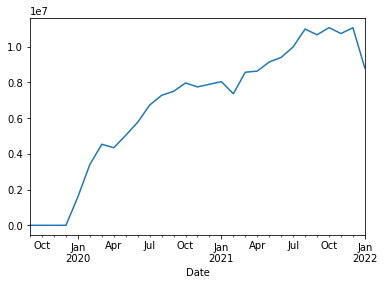

In [32]:
cols = [('Population_Interpolated',     'sum'),
            ('Population_Interpolated',    'mean')]
monthly[cols[0]].plot()

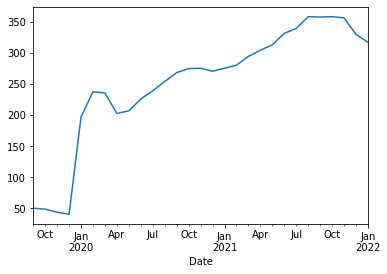

In [34]:
monthly[cols[1]].plot()

## Subset to Previous and Chart

In [36]:
p.head()

,State,Jail,Date,Population,Population_Interpolated,Admissions,Admissions_Interpolated,Releases,Releases_Interpolated,First_Scraped,Last_Scraped,As_Of
0,AL,Butler,2021-12-06,87.0,87.0,87.0,87.0,1.0,1.0,2021-12-06,2022-01-25,2022-01-25
1,AL,Butler,2021-12-07,88.0,88.0,2.0,2.0,1.0,1.0,2021-12-06,2022-01-25,2022-01-25
2,AL,Butler,2021-12-08,88.0,88.0,1.0,1.0,11.0,11.0,2021-12-06,2022-01-25,2022-01-25
3,AL,Butler,2021-12-09,81.0,81.0,4.0,4.0,2.0,2.0,2021-12-06,2022-01-25,2022-01-25
4,AL,Butler,2021-12-10,81.0,81.0,2.0,2.0,0.0,0.0,2021-12-06,2022-01-25,2022-01-25


In [40]:
p['STATE-COUNTY'] = p['State'] + "-" + p['Jail']
print(p['STATE-COUNTY'].nunique())
in_original = [jail for jail in p['STATE-COUNTY'].unique() if jail in prior['STATE-COUNTY'].unique()]
print(len(in_original))

1211
415


In [41]:
in_original[:5]

['AL-Autauga', 'AL-Chilton', 'AL-Cleburne', 'AL-Clay', 'AL-Coosa']

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

sns.set_style('whitegrid')

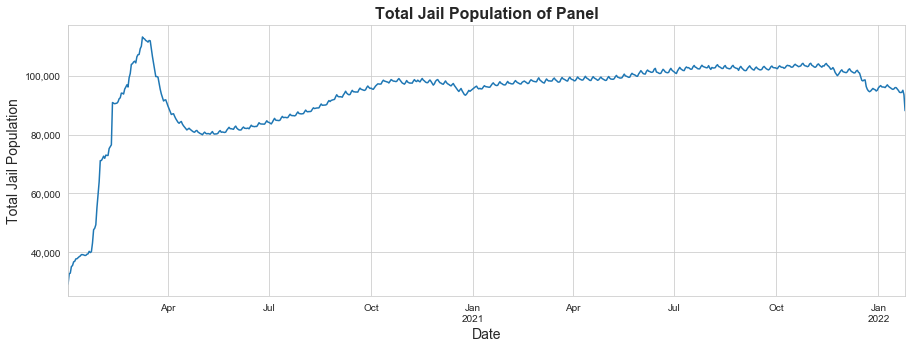

In [71]:
daily_totals = p[p['STATE-COUNTY'].isin(in_original)].groupby('Date')['Population_Interpolated'].sum()
fig, ax = plt.subplots(figsize=(15,5))
daily_totals.plot();
plt.title("Total Jail Population of Panel", size=16, weight='bold')
plt.ylabel("Total Jail Population", size=14)
plt.xlabel("Date", size=14)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# ax.xaxis.set_major_formatter(md.DateFormatter('%b'))
# plt.xticks()


Text(0.5, 0, 'Date')

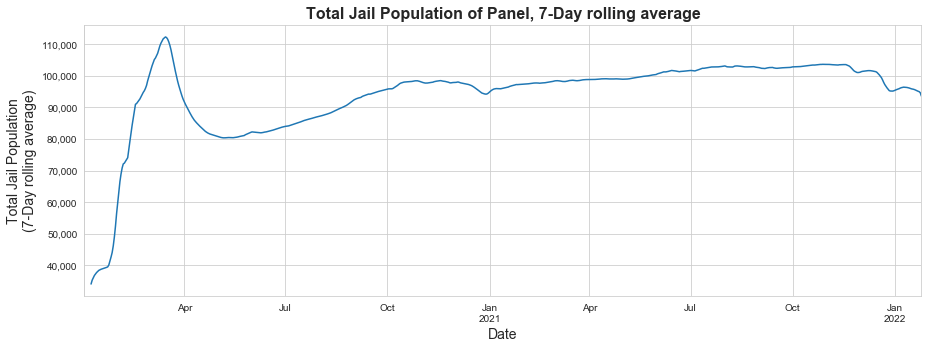

In [72]:
fig, ax = plt.subplots(figsize=(15,5))
daily_totals.rolling(7).mean().plot();
plt.title("Total Jail Population of Panel, 7-Day rolling average", size=16, weight='bold')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.ylabel("Total Jail Population\n(7-Day rolling average)", size=14)
plt.xlabel("Date", size=14)

In [83]:
october = pd.read_csv("October_Data_pulled_01-11-2022-811am.csv")
october.Date = pd.to_datetime(october.Date)
october.Date = october.Date.dt.tz_localize(None)
october.head(3)

,Date,Race,Age,Gender,JailId,Population_Interpolated,Admissions_Interpolated,Releases_Interpolated,ScrapeMissing
0,2021-11-01,All,All,All,FL-Hillsborough,2945.0,48.0,0.0,0
1,2021-11-01,All,All,All,TX-Collin,1148.0,40.0,36.0,0
2,2021-11-01,All,All,All,MN-Stearns,153.0,8.0,18.0,0


In [74]:
p.head(2)

,State,Jail,Date,Population,Population_Interpolated,Admissions,Admissions_Interpolated,Releases,Releases_Interpolated,First_Scraped,Last_Scraped,As_Of,STATE-COUNTY
0,AL,Butler,2021-12-06,87.0,87.0,87.0,87.0,1.0,1.0,2021-12-06,2022-01-25,2022-01-25,AL-Butler
1,AL,Butler,2021-12-07,88.0,88.0,2.0,2.0,1.0,1.0,2021-12-06,2022-01-25,2022-01-25,AL-Butler


In [77]:
now = p.pivot(index='STATE-COUNTY',columns='Date',values='Population_Interpolated')
now.head(3)

Date,2019-09-24,2019-09-25,2019-09-26,2019-09-27,2019-09-28,2019-09-29,2019-09-30,2019-10-01,2019-10-02,2019-10-03,...,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24,2022-01-25
STATE-COUNTY,,,,,,,,,,,,,,,,,,,,,
AL-Autauga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,101.0,98.0,97.0,98.0,98.0,104.0,103.0,101.0
AL-Baldwin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,563.0,567.0,556.0,556.0,559.0,561.0,567.0,578.0,584.0,581.0
AL-Blount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,155.0,158.0,157.0,152.0,145.0,148.0,144.0,144.0,146.0,144.0


In [85]:
oct_pivot = october.rename(columns={"JailId":"STATE-COUNTY"}).pivot(index='STATE-COUNTY',columns='Date',values='Population_Interpolated')
oct_pivot

Date,2021-11-01,2021-11-02,2021-11-03,2021-11-04,2021-11-05,2021-11-06,2021-11-07,2021-11-08,2021-11-09,2021-11-10,...,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30
STATE-COUNTY,,,,,,,,,,,,,,,,,,,,,
AL-Autauga,162.000000,165.000000,165.000000,162.000000,160.000000,159.000000,162.000000,161.000000,161.000000,165.000000,...,167.000000,164.00000,164.000000,163.000000,162.00000,164.000000,164.000000,167.00000,165.000000,165.000000
AL-Baldwin,633.000000,633.000000,637.000000,628.000000,609.000000,601.000000,608.000000,611.000000,586.000000,580.000000,...,580.000000,580.00000,570.000000,565.000000,568.00000,575.000000,577.000000,582.00000,576.000000,570.000000
AL-Blount,186.000000,186.000000,182.000000,183.000000,181.000000,177.000000,177.000000,178.000000,183.000000,180.000000,...,178.000000,179.00000,181.000000,179.000000,176.00000,176.000000,176.000000,181.00000,182.000000,183.000000
AL-Calhoun,494.000000,497.000000,507.000000,499.000000,494.000000,494.000000,499.000000,476.000000,460.000000,485.000000,...,501.000000,498.00000,485.000000,483.000000,483.00000,483.000000,490.000000,494.00000,498.000000,492.000000
AL-Cherokee,66.000000,68.000000,69.000000,72.000000,72.000000,73.000000,74.000000,75.000000,73.000000,74.000000,...,79.000000,80.00000,83.000000,82.000000,78.00000,76.000000,79.000000,79.00000,79.000000,78.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY-Lincoln,21.000000,22.000000,21.000000,21.000000,21.000000,20.000000,19.000000,19.000000,19.000000,18.000000,...,27.000000,26.00000,25.000000,25.000000,24.00000,24.000000,26.000000,27.00000,30.000000,27.000000
WY-Niobrara,8.000000,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,7.000000,7.00000,7.000000,7.000000,7.00000,8.000000,9.000000,9.00000,9.000000,7.000000
WY-Park,98.000000,98.000000,108.000000,100.000000,126.000000,112.000000,116.000000,112.000000,96.000000,98.000000,...,98.000000,94.00000,92.000000,96.000000,94.00000,108.000000,96.000000,96.00000,94.000000,94.000000


In [86]:
diff = now - oct_pivot
diff

Date,2019-09-24,2019-09-25,2019-09-26,2019-09-27,2019-09-28,2019-09-29,2019-09-30,2019-10-01,2019-10-02,2019-10-03,...,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24,2022-01-25
STATE-COUNTY,,,,,,,,,,,,,,,,,,,,,
AL-Autauga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL-Baldwin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL-Blount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL-Butler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL-Calhoun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY-Lincoln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WY-Niobrara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WY-Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


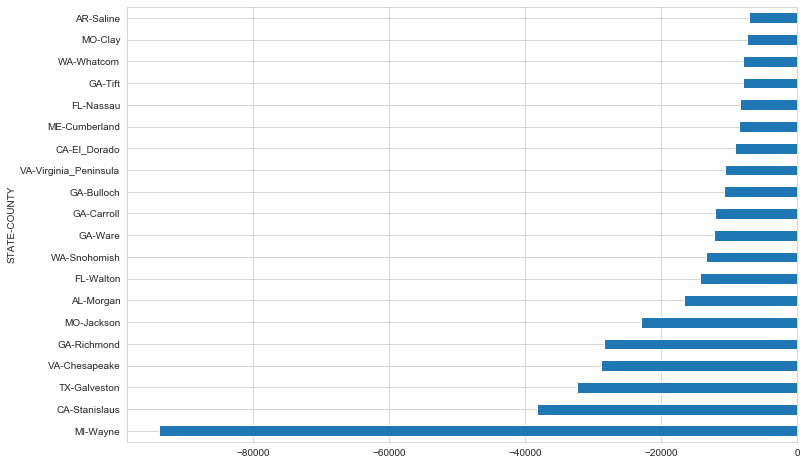

In [107]:
temp = diff.sum()
has_diff = temp[temp != 0].index #.plot()

nov_differences = diff[has_diff].sum(axis=1)
temp = nov_differences[nov_differences.index.isin(in_original)]
tot = temp.sum()
temp.sort_values()[:20].plot(kind='barh', figsize=(12,8))

In [112]:
temp.sort_values().index[:5]

Index(['MI-Wayne', 'CA-Stanislaus', 'TX-Galveston', 'VA-Chesapeake',
       'GA-Richmond'],
      dtype='object', name='STATE-COUNTY')

In [103]:
len(diff)

1211

In [110]:
october.head()

,Date,Race,Age,Gender,JailId,Population_Interpolated,Admissions_Interpolated,Releases_Interpolated,ScrapeMissing
0,2021-12-01 00:00:00+00:00,All,All,All,FL-Hillsborough,2860.0,99.0,110.0,0
1,2021-12-01 00:00:00+00:00,All,All,All,TX-Collin,1054.0,37.0,49.0,0
2,2021-12-01 00:00:00+00:00,All,All,All,MN-Stearns,134.0,5.0,7.0,0
3,2021-12-01 00:00:00+00:00,All,All,All,IN-Marion,1958.0,84.0,101.0,0
4,2021-12-01 00:00:00+00:00,All,All,All,VA-Middle_River,747.0,8.0,6.0,0


In [113]:
october.Date.unique()

<DatetimeArray>
['2021-12-01 00:00:00+00:00', '2021-12-02 00:00:00+00:00',
 '2021-12-03 00:00:00+00:00', '2021-12-04 00:00:00+00:00',
 '2021-12-05 00:00:00+00:00', '2021-12-06 00:00:00+00:00',
 '2021-12-07 00:00:00+00:00', '2021-12-08 00:00:00+00:00',
 '2021-12-09 00:00:00+00:00', '2021-12-10 00:00:00+00:00',
 '2021-12-11 00:00:00+00:00', '2021-12-12 00:00:00+00:00',
 '2021-12-13 00:00:00+00:00', '2021-12-14 00:00:00+00:00',
 '2021-12-15 00:00:00+00:00', '2021-12-16 00:00:00+00:00',
 '2021-12-17 00:00:00+00:00', '2021-12-18 00:00:00+00:00',
 '2021-12-19 00:00:00+00:00', '2021-12-20 00:00:00+00:00',
 '2021-12-21 00:00:00+00:00', '2021-12-22 00:00:00+00:00',
 '2021-12-23 00:00:00+00:00', '2021-12-24 00:00:00+00:00',
 '2021-12-25 00:00:00+00:00', '2021-12-26 00:00:00+00:00',
 '2021-12-27 00:00:00+00:00', '2021-12-28 00:00:00+00:00',
 '2021-12-29 00:00:00+00:00', '2021-12-30 00:00:00+00:00',
 '2021-12-31 00:00:00+00:00']
Length: 31, dtype: datetime64[ns, UTC]

## Recreate Previous Input Schema to Generate 3 tab view:

 County	| Population	| Scrape_Date |	State	| Facility_Identifier | 

In [127]:
ex = pd.read_csv("Combined_Prior_to_Full_Script_Run_01-09-2022.csv")
ex.head(2)

,Population,Scrape_Date,STATE-COUNTY,Month,Year,DayOfWeek
0,172.0,2020-03-10,AL-Autauga,3,2020,Tuesday
1,173.0,2020-03-11,AL-Autauga,3,2020,Wednesday


In [114]:
print(p.columns)
p.head(2)

Index(['State', 'Jail', 'Date', 'Population', 'Population_Interpolated',
       'Admissions', 'Admissions_Interpolated', 'Releases',
       'Releases_Interpolated', 'First_Scraped', 'Last_Scraped', 'As_Of',
       'STATE-COUNTY'],
      dtype='object')


,State,Jail,Date,Population,Population_Interpolated,Admissions,Admissions_Interpolated,Releases,Releases_Interpolated,First_Scraped,Last_Scraped,As_Of,STATE-COUNTY
0,AL,Butler,2021-12-06,87.0,87.0,87.0,87.0,1.0,1.0,2021-12-06,2022-01-25,2022-01-25,AL-Butler
1,AL,Butler,2021-12-07,88.0,88.0,2.0,2.0,1.0,1.0,2021-12-06,2022-01-25,2022-01-25,AL-Butler


In [128]:
df = p.copy()
cols2keep = ['State', 'Jail', 'Date', 'Population_Interpolated', 'STATE-COUNTY']
df = df[cols2keep]
df = df.rename(columns = {'Jail':'County',
                         'Facility_Identifier' : 'STATE-COUNTY',
                         'Population_Interpolated':'Population',
                         'Date':'Scrape_Date'})
df['Month'] = df['Scrape_Date'].dt.strftime("%m")
df['Year'] = df['Scrape_Date'].dt.strftime("%Y")
df['DayOfWeek'] = df['Scrape_Date'].dt.strftime("%A")
df.head(3)

,State,County,Scrape_Date,Population,STATE-COUNTY,Month,Year,DayOfWeek
0,AL,Butler,2021-12-06,87.0,AL-Butler,12,2021,Monday
1,AL,Butler,2021-12-07,88.0,AL-Butler,12,2021,Tuesday
2,AL,Butler,2021-12-08,88.0,AL-Butler,12,2021,Wednesday


In [129]:
df.tail(3)

,State,County,Scrape_Date,Population,STATE-COUNTY,Month,Year,DayOfWeek
667408,WY,Teton,2022-01-23,17.0,WY-Teton,01,2022,Sunday
667409,WY,Teton,2022-01-24,17.0,WY-Teton,01,2022,Monday
667410,WY,Teton,2022-01-25,17.0,WY-Teton,01,2022,Tuesday


In [130]:
df.to_csv("Transformed_RawData_From_PopulationAggregateAPIendpoint.csv", index=False)

## 1-26-2022

Check output from script using API output csv from above:

In [131]:
output = pd.read_excel("Jail_Summaries_2020-01-06 00:00:00_to_2022-01-25 00:00:00_Generated_01-26-2022.xlsx")
output.head(3)

,STATE-COUNTY,2020-01-06 00:00:00,2020-01-13 00:00:00,2020-01-20 00:00:00,2020-01-27 00:00:00,2020-02-03 00:00:00,2020-02-10 00:00:00,2020-02-17 00:00:00,2020-02-24 00:00:00,2020-03-02 00:00:00,...,FirstMondayAvailable5-2020,FirstMondayAvailable5-2021,FirstMondayAvailable6-2020,FirstMondayAvailable6-2021,FirstMondayAvailable7-2020,FirstMondayAvailable7-2021,FirstMondayAvailable8-2020,FirstMondayAvailable8-2021,FirstMondayAvailable9-2020,FirstMondayAvailable9-2021
0,AL-Autauga,NaN,NaN,NaN,NaN,NaN,164.0,NaN,NaN,171.4,...,156.0,163.0,174.0,166.0,170.0,158.0,147.0,159.0,160.0,150.0
1,AL-Chilton,NaN,NaN,NaN,244.0,236.0,NaN,NaN,NaN,208.0,...,172.0,177.0,175.0,211.0,184.0,198.0,158.0,216.0,153.0,194.0
2,AL-Clay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.0,48.0,31.0,54.0,34.0,60.0,30.0,44.0,32.0,54.0


In [133]:
o2 = pd.read_excel("Jail_Summaries_2020-01-06 00:00:00_to_2022-01-25 00:00:00_Generated_01-26-2022.xlsx", sheet_name=1)
o2.head(2)

,Scrape_Date,Count_Of_Jails,Total_Jail_Population,Seven_Day_Rolling_Average
0,2020-01-02,139,29127.00,NaN
1,2020-01-03,159,32633.25,NaN


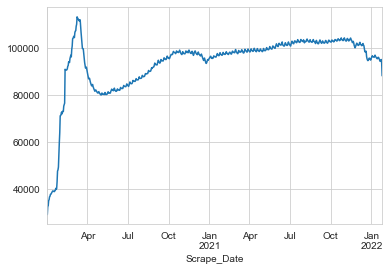

In [134]:
o2.set_index('Scrape_Date')['Total_Jail_Population'].plot()

[Return to Table of Contents](#toc)